In [3]:
from sklearn.datasets import load_iris
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics, linear_model
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestClassifier
from time import time
import matplotlib.pyplot as plt
import csv

In [14]:
from sklearn.datasets import load_iris
iris = load_iris()

from sklearn.datasets import load_digits
digits = load_digits()

from sklearn.datasets import load_wine
wine = load_wine()

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

cars = csv.reader((open('car.data', 'rb')), delimiter = ',', quotechar = '|')
bank = csv.reader((open('bank.csv', 'rb')), delimiter = ',', quotechar = '|')

clf = svm.SVC(kernel = 'linear', C=1)
scores = cross_val_score(clf, iris.data, iris.target, cv = 5)


In [9]:
def testGrid(dataset):
    result = []
    n_samples = len(digits.data)
    X = digits.data.reshape((n_samples, -1))
    y = digits.target

    # Split the dataset in two equal parts
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.5, random_state=0)

    # Set the parameters by cross-validation
    tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                         'C': [1, 10, 100, 1000]},
                        {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

    scores = ['precision', 'recall']

    for score in scores:
        print("# Tuning hyper-parameters for %s" % score)
        print()
        
        clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
        start = time()
        clf.fit(X_train, y_train)

        print("Best parameters set found on development set:")
        print()
        print("Grid scores on development set:")
        print()
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        result = [means, stds]
        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r"
                  % (mean, std * 2, params))
        print()

        y_true, y_pred = y_test, clf.predict(X_test)
        print(classification_report(y_true, y_pred))
        print()
        print("In time = %0.3f" % (time() - start) )
    return result


In [11]:
def testRandom(dataset):
    result = []
    n_samples = len(digits.data)
    X = digits.data
    y = digits.target

    # Split the dataset in two equal parts
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.5, random_state=0)
    
    param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
    scores = ['precision', 'recall']
    for score in scores:
        print("# Tuning hyper-parameters for %s" % score)
        print()

        n_iter_search = 20
        clf = RandomizedSearchCV(RandomForestClassifier(n_estimators=20), param_distributions=param_dist,
                                       n_iter=n_iter_search, cv=5)
        start = time()
        clf.fit(X_train, y_train)
        print("Grid scores on development set:")
        print()
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        result = [means, stds]
        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r"
                  % (mean, std * 2, params))
        print()

        y_true, y_pred = y_test, clf.predict(X_test)
        print(classification_report(y_true, y_pred))
        print()
        print("In time = %0.3f" % (time() - start) )
    return result


In [15]:
GridScores = testGrid(bank)

# Tuning hyper-parameters for precision
()
Best parameters set found on development set:
()
Grid scores on development set:
()
0.986 (+/-0.016) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.001}
0.959 (+/-0.029) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.0001}
0.988 (+/-0.017) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.001}
0.982 (+/-0.026) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.0001}
0.988 (+/-0.017) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.001}
0.982 (+/-0.025) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.0001}
0.988 (+/-0.017) for {'kernel': 'rbf', 'C': 1000, 'gamma': 0.001}
0.982 (+/-0.025) for {'kernel': 'rbf', 'C': 1000, 'gamma': 0.0001}
0.975 (+/-0.014) for {'kernel': 'linear', 'C': 1}
0.975 (+/-0.014) for {'kernel': 'linear', 'C': 10}
0.975 (+/-0.014) for {'kernel': 'linear', 'C': 100}
0.975 (+/-0.014) for {'kernel': 'linear', 'C': 1000}
()
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       0.97      1.00  

In [12]:
RandScores = testRandom(digits)

# Tuning hyper-parameters for precision
()


/home/eoin/.local/lib/python2.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Grid scores on development set:
()
0.951 (+/-0.017) for {'max_features': 3, 'min_samples_split': 10, 'bootstrap': False, 'criterion': 'entropy', 'max_depth': None}
0.841 (+/-0.060) for {'max_features': 4, 'min_samples_split': 9, 'bootstrap': False, 'criterion': 'gini', 'max_depth': 3}
0.847 (+/-0.043) for {'max_features': 4, 'min_samples_split': 2, 'bootstrap': False, 'criterion': 'gini', 'max_depth': 3}
0.835 (+/-0.057) for {'max_features': 5, 'min_samples_split': 8, 'bootstrap': True, 'criterion': 'entropy', 'max_depth': 3}
0.826 (+/-0.009) for {'max_features': 6, 'min_samples_split': 2, 'bootstrap': False, 'criterion': 'entropy', 'max_depth': 3}
0.806 (+/-0.055) for {'max_features': 10, 'min_samples_split': 3, 'bootstrap': False, 'criterion': 'gini', 'max_depth': 3}
0.849 (+/-0.046) for {'max_features': 4, 'min_samples_split': 5, 'bootstrap': True, 'criterion': 'gini', 'max_depth': 3}
0.845 (+/-0.037) for {'max_features': 10, 'min_samples_split': 6, 'bootstrap': False, 'criterion': 

/home/eoin/.local/lib/python2.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[array([0.98563755, 0.95667153, 0.98666744, 0.98069693, 0.98666744,
       0.98089412, 0.98666744, 0.98089412, 0.97236116, 0.97236116,
       0.97236116, 0.97236116]), array([0.00973444, 0.01465219, 0.00958098, 0.01411744, 0.00958098,
       0.01294434, 0.00958098, 0.01294434, 0.00607935, 0.00607935,
       0.00607935, 0.00607935])]


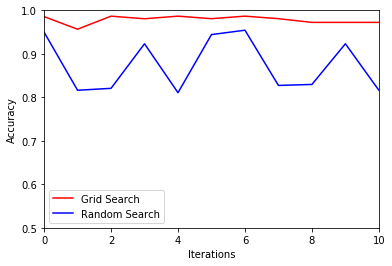

In [16]:
print(GridScores)
plt.plot(GridScores[0], 'r', label='Grid Search')
plt.plot(RandScores[0], 'b', label = 'Random Search')
plt.ylabel('Accuracy')
plt.xlabel('Iterations')
plt.axis([0, 10, .5, 1])
plt.legend();
plt.show()


In [ ]:
def testBayes(dataset):
    